In [1]:
import csv

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
# Specify data paths
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier/keypoint_classifier.hdf5'

# Set number of classes

In [3]:
# Change training classes if necessary
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([1595, 1663, 1510,  672,  164,  257,  139,  190], dtype=int64))


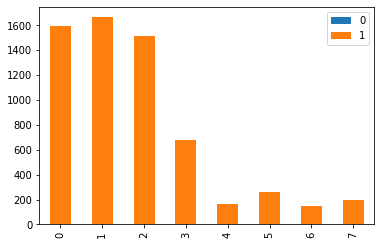

In [7]:
# Classes count
counts = np.unique(y_dataset, return_counts=True)
df = pd.DataFrame(counts)
df.T.plot(kind="bar", stacked=True)
print(counts)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [12]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False, save_best_only=True)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, verbose=1)

In [13]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/40
73/73 [==============================] - 5s 13ms/step - loss: 1.8479 - accuracy: 0.2609 - val_loss: 1.5565 - val_accuracy: 0.5097

Epoch 00001: val_loss improved from inf to 1.55646, saving model to keypoint_classifier\keypoint_classifier.hdf5
Epoch 2/40
73/73 [==============================] - 0s 6ms/step - loss: 1.2393 - accuracy: 0.5980 - val_loss: 0.9328 - val_accuracy: 0.7293

Epoch 00002: val_loss improved from 1.55646 to 0.93276, saving model to keypoint_classifier\keypoint_classifier.hdf5
Epoch 3/40
73/73 [==============================] - 0s 6ms/step - loss: 0.7343 - accuracy: 0.7751 - val_loss: 0.5523 - val_accuracy: 0.8404

Epoch 00003: val_loss improved from 0.93276 to 0.55233, saving model to keypoint_classifier\keypoint_classifier.hdf5
Epoch 4/40
73/73 [==============================] - 0s 5ms/step - loss: 0.4662 - accuracy: 0.8501 - val_loss: 0.3588 - val_accuracy: 0.8882

Epoch 00004: val_loss improved from 0.55233 to 0.35877, saving model to keypoint_classif

In [15]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [16]:
# Model evaluation
# TODO Test on loaded model
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=64)

25/25 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9955


In [13]:
import tensorflow 
from tensorflow.keras.models import load_model

In [14]:
model = load_model(model_save_path)

# Confusion matrix

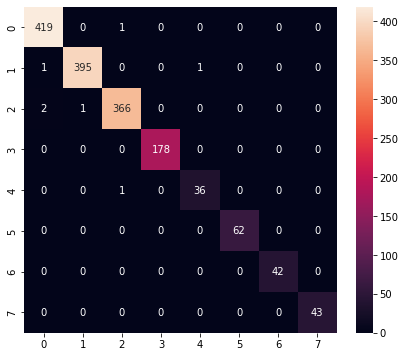

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       420
           1       1.00      0.99      1.00       397
           2       0.99      0.99      0.99       369
           3       1.00      1.00      1.00       178
           4       0.97      0.97      0.97        37
           5       1.00      1.00      1.00        62
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        43

    accuracy                           1.00      1548
   macro avg       0.99      0.99      0.99      1548
weighted avg       1.00      1.00      1.00      1548



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)